# <center>HuggingFace</center>
<center><img src = https://miro.medium.com/max/576/1*7i5LhQ33_EdxMaPu3iteQg@2x.png></center>

If you are interested in the field of NLP, chances are you've heard of HuggingFace Transformers. As their [GitHub page](https://github.com/huggingface/transformers) says, they provide **State-of-the-art Natural Language Processing for PyTorch and TensorFlow 2.0**

[Recently](https://discuss.huggingface.co/t/new-pipeline-for-zero-shot-text-classification/681), they included support for zero-shot-classification. I am going to use this Zero-Shot Classification Pipeline for multi-class classification on the Arxiv Dataset.

<center><h1>Introduction to Zero Shot Learning</h1></center>
<br>
Zero-shot learning is a problem setup in machine learning, where at test time, a learner observes samples from classes that were not observed during training, and needs to predict the category they belong to. This problem is widely studied in computer vision, natural language processing and machine perception.

Quite simply put, zero-shot classification refers to the class of machine learning problems where we want our models to predict output for classes which it did not encounter during training time. 

![Zero Shot Learning](https://amitness.com/images/zero-shot-vs-transfer.png)


For Traditional Supervised Learning, we get some data we want to recognise and these data live in a feature space. Annotations for the data will be provided and that gives us some labels in that feature space.


<center><h4>I will be using the HuggingFace Python package for Text Classification task for this Netflix dataset. I'm just a beginner with this so please feel free to comment if I can do something better.</h4></center>


# Importing Libraries


In [1]:
# Install all necessary libraries

import pandas as pd
import numpy as np
import os
import pandas as pd
import warnings
import sys
from transformers import pipeline

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")


# Processing the Data


In [2]:
df = pd.read_csv("/kaggle/input/dataset-netflix-shows/netflix_titles.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."


In [3]:
# Select the 2 columns we need
df = df[['listed_in', 'description']]
# Split the text and get the length thereafter
df['text_length'] = df['description'].str.split().str.len()
# Sort the new dataframe by the text length
df2 = df.sort_values(by = ['text_length'], ascending = False)
df2.head()

,listed_in,description,text_length
4948,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48
6221,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44
215,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44
593,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44
5990,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42


In [4]:
# Create a new DF that has only products with more than text length of 40
df2 = df2[df2['text_length']>40]
# Reset the index of the new DF
df2 = df2.reset_index(drop = True)
df2

,listed_in,description,text_length
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42
5,"Action & Adventure, International Movies","Leader of the Ten Kwangtung Tigers, Tieh Chiao-san works with his kung fu students to protect his village from crime. But when an opium dealer starts to ruin the town, Tieh Chiao-san struggles to fight back, thanks to his growing opium addiction.",42
6,Dramas,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment.",41
7,"Action & Adventure, Anime Features, Sci-Fi & Fantasy","When a group of vicious Sinners plots to escape from this eternal prison in Hell, they discover that Substitute Soul Reaper Ichigo is the key to their freedom. The Sinners launch an attack and in the process kidnap Ichigo's younger sister.",41
8,"Action & Adventure, Comedies, Dramas","Paul Newman proves he's still got prodigious acting chops, playing an aging bank robber who may have one last job in him. Faking a stroke, the incarcerated Newman is transferred to a nursing home and the care of a skeptical nurse.",41


In [5]:
all_categories=",".join([cat for cat in df2['listed_in']])

unique_categories=set(all_categories.split(","))
unique_categories
print("Number of Unique Categories ",len(unique_categories), unique_categories)

Number of Unique Categories  8 {'Action & Adventure', 'Children & Family Movies', ' Comedies', ' Anime Features', ' Sci-Fi & Fantasy', 'Dramas', ' International Movies', ' Dramas'}


In [6]:
def isCategory(aspectCategory,category):
    if category in aspectCategory:
        return 1
    else:
        return 0

In [7]:
for cat in unique_categories:
    df2[cat]= df2['listed_in'].apply(lambda x:isCategory(x,cat))

df2.head()

,listed_in,description,text_length,Action & Adventure,Children & Family Movies,Comedies,Anime Features,Sci-Fi & Fantasy,Dramas,International Movies,Dramas
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48,0,0,0,0,0,1,1,0
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44,0,1,0,0,0,0,0,0
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44,1,0,0,0,0,1,1,1
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes a play for the most popular girl in his school, 10-year-old Natalie takes on the dreaded snowplow man, and Dad gets into a showdown with a rival meteorologist.",44,0,1,1,0,0,0,0,0
4,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is the best of the Jinyiwei, an elite assassin squad made up of highly trained former street urchins. When evil eunuch Jia unseats the emperor, Quinglong is called to action but is quickly betrayed.",42,1,0,0,0,0,0,1,0


# Code Implementation

In [8]:
# Initializing Zero-Shot Classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [9]:
# sequences_to_classify
sequences = df2.iloc[2]["description"]

# candidate_labels
labels = ["Actions", "Adventure", "Crime", "Violence", "Finance", "Food"]

# Running the classifier
classifier(sequences, labels, multi_label=True)

{'sequence': 'Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.',
 'labels': ['Actions', 'Violence', 'Crime', 'Adventure', 'Finance', 'Food'],
 'scores': [0.8735316395759583,
  0.8443192839622498,
  0.42162415385246277,
  0.215681254863739,
  0.004167917184531689,
  0.0024876396637409925]}

## Trial : Example 
When given the irrelevant labels to the classifier

In [10]:
# sequences_to_classify
sequences = df2.iloc[2]["description"]

# candidate_labels
labels = [ "comedy", "Finance", "Food","gaming"]

# Running the classifier
classifier(sequences, labels, multi_label=True)

{'sequence': 'Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.',
 'labels': ['Finance', 'Food', 'gaming', 'comedy'],
 'scores': [0.004167917184531689,
  0.0024876396637409925,
  0.00038156984373927116,
  0.0001847402600105852]}

## Predict on whole dataset

In [11]:
zero_shot_classes=list(unique_categories)


In [12]:
from tqdm.notebook import tqdm_notebook

tqdm_notebook.pandas()

df2['zero_shot_output']=df2['description'].progress_apply(lambda x:classifier(x,zero_shot_classes,
                            multi_label=True,hypothesis_template="Based on a true story{}"))

  0%|          | 0/9 [00:00<?, ?it/s]

In [13]:
df2.to_csv("Netflix_Zero_Shot_Prediction.csv",index=False)

# Making Predictions

In [14]:
def getLabelScore(zero_shot_output):
    labels=zero_shot_output['labels']
    scores=zero_shot_output['scores']
    num_labels=len(labels)
    score_dict={label:scores[idx] for idx,label in enumerate(labels)}
    return score_dict

def predictedScore(zero_shot_label_score,label):
    return zero_shot_label_score[label]

def is_predicted(zero_shot_label_score,label, threshold=0.5):
    if zero_shot_label_score[label]>=threshold:
        return 1
    else:
        return 0

In [15]:
import ast
#data['zero_shot_output']=data['zero_shot_output'].apply(lambda x:ast.literal_eval(x))
df2['zero_shot_label_score'] =df2['zero_shot_output'].apply(lambda x:getLabelScore(x))

In [16]:
df2.head()

,listed_in,description,text_length,Action & Adventure,Children & Family Movies,Comedies,Anime Features,Sci-Fi & Fantasy,Dramas,International Movies,Dramas,zero_shot_output,zero_shot_label_score
0,"Dramas, International Movies","An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.",48,0,0,0,0,0,1,1,0,"{'sequence': 'An Indian village is abuzz with news that a major movie star is coming to town – even more so because the town barber went to school with him. But as the day of the actor's visit approaches, the humble barber begins to worry he won't be recognized.', 'labels': ['Dramas', 'Children & Family Movies', 'Action & Adventure', ' International Movies', ' Dramas', ' Sci-Fi & Fantasy', ' Comedies', ' Anime Features'], 'scores': [0.6809404492378235, 0.5358092188835144, 0.43985724449157715, 0.13803400099277496, 0.09333585202693939, 0.028928373008966446, 0.02492261864244938, 0.01845337077975273]}","{'Dramas': 0.6809404492378235, 'Children & Family Movies': 0.5358092188835144, 'Action & Adventure': 0.43985724449157715, ' International Movies': 0.13803400099277496, ' Dramas': 0.09333585202693939, ' Sci-Fi & Fantasy': 0.028928373008966446, ' Comedies': 0.02492261864244938, ' Anime Features': 0.01845337077975273}"
1,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.",44,0,1,0,0,0,0,0,0,"{'sequence': 'Half-dog, half-wolf Balto (voiced by Maurice LaMarche) and his wife proudly put their pups up for adoption to humans, but when nobody takes daughter Aleu because she looks too much like a wolf, she runs away to search for her place in the world.', 'labels': ['Children & Family Movies', 'Action & Adventure', 'Dramas', ' International Movies', ' Dramas', ' Anime Features', ' Sci-Fi & Fantasy', ' Comedies'], 'scores': [0.9415066838264465, 0.8892443776130676, 0.511713981628418, 0.2176641821861267, 0.13990110158920288, 0.12456080317497253, 0.10370185971260071, 0.09905635565519333]}","{'Children & Family Movies': 0.9415066838264465, 'Action & Adventure': 0.8892443776130676, 'Dramas': 0.511713981628418, ' International Movies': 0.2176641821861267, ' Dramas': 0.13990110158920288, ' Anime Features': 0.12456080317497253, ' Sci-Fi & Fantasy': 0.10370185971260071, ' Comedies': 0.09905635565519333}"
2,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.",44,1,0,0,0,0,1,1,1,"{'sequence': 'Based on a true story, this action film follows an incident that stunned a nation in the early 1990s. In Mumbai, India, the notorious gangster Maya holds off veteran cop Khan and a force of more than 200 policemen in a six-hour bloody gunfight.', 'labels': ['Action & Adventure', ' International Movies', 'Dramas', ' Dramas', ' Anime Features', ' Sci-Fi & Fantasy', 'Children & Family Movies', ' Comedies'], 'scores': [0.9430562257766724, 0.8655526041984558, 0.12100867927074432, 0.04837482422590256, 0.03195957839488983, 0.012641016393899918, 0.00594716239720583, 0.0014541021082550287]}","{'Action & Adventure': 0.9430562257766724, ' International Movies': 0.8655526041984558, 'Dramas': 0.12100867927074432, ' Dramas': 0.04837482422590256, ' Anime Features': 0.03195957839488983, ' Sci-Fi & Fantasy': 0.012641016393899918, 'Children & Family Movies': 0.00594716239720583, ' Comedies': 0.0014541021082550287}"
3,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the Wheeler family cuts loose. Hal makes

In [17]:
for cat in zero_shot_classes:
    df2[cat+"_pred_score"]=df2['zero_shot_label_score'].apply(lambda x:predictedScore(x,cat))

## AUC-ROC curve

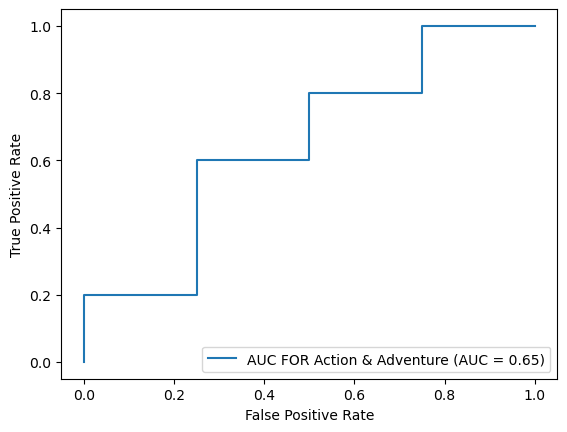

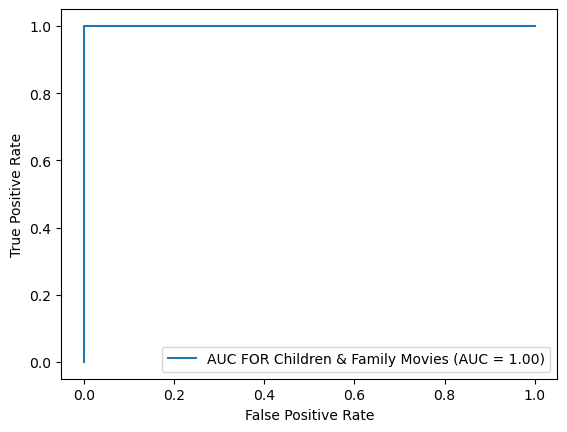

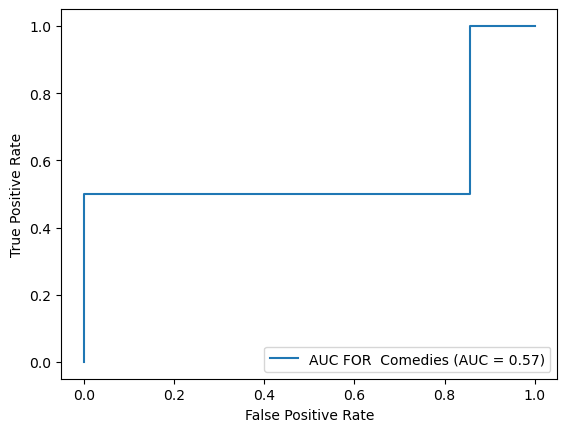

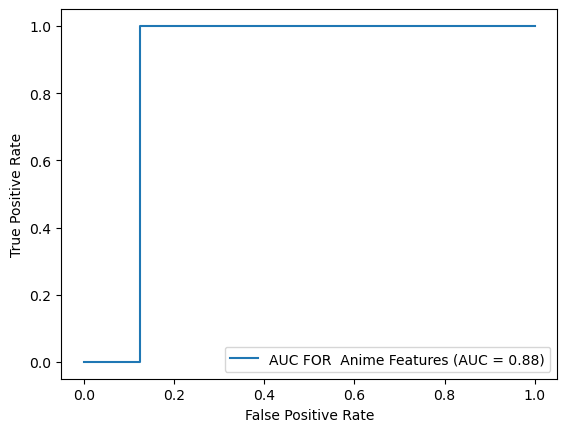

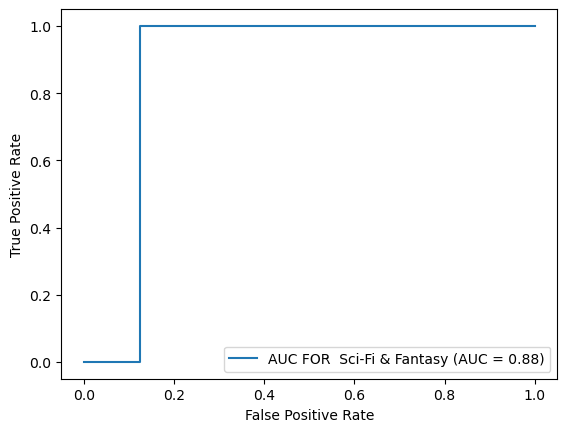

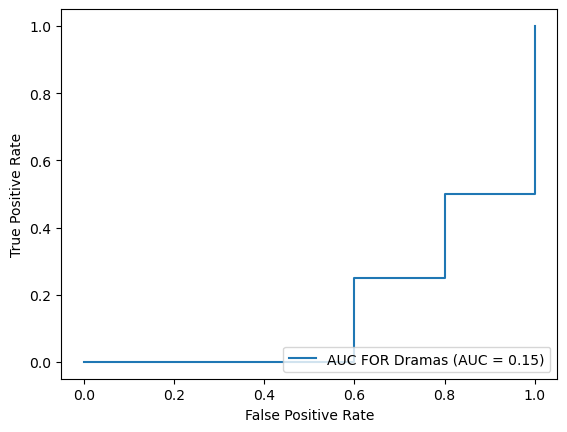

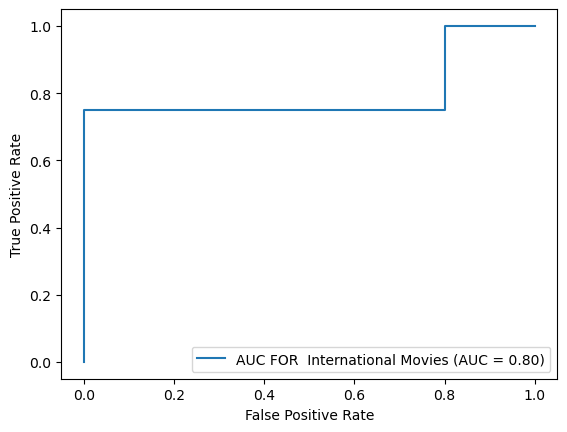

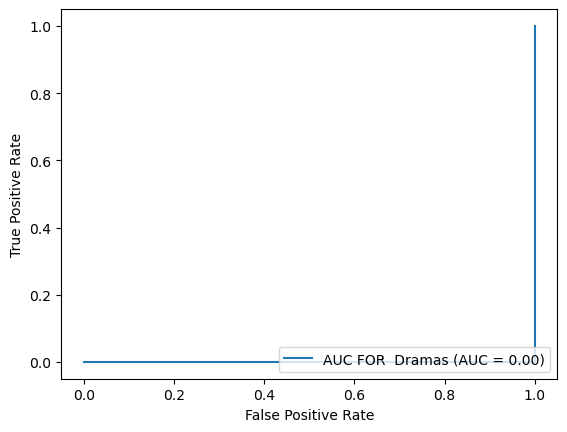

In [18]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
for cat in unique_categories:
    fpr, tpr, thresholds = roc_curve(df2[cat], df2[cat+"_pred_score"])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='AUC FOR '+cat)
    display.plot()

In [19]:
threshold={}
for cat in unique_categories:
    fpr, tpr, thresholds = roc_curve(df2[cat], df2[cat+"_pred_score"])
    gmean = np.sqrt(tpr * (1 - fpr))
    print("Category "+cat)
    # Find the optimal threshold
    index = np.argmax(gmean)
    thresholdOpt = round(thresholds[index], ndigits = 4)
    gmeanOpt = round(gmean[index], ndigits = 4)
    fprOpt = round(fpr[index], ndigits = 4)
    tprOpt = round(tpr[index], ndigits = 4)
    print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
    threshold[cat]=thresholdOpt
    print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Category Action & Adventure
Best Threshold: 0.9431 with G-Mean: 0.6708
FPR: 0.25, TPR: 0.6
Category Children & Family Movies
Best Threshold: 0.9415 with G-Mean: 1.0
FPR: 0.0, TPR: 1.0
Category  Comedies
Best Threshold: 0.2459 with G-Mean: 0.7071
FPR: 0.0, TPR: 0.5
Category  Anime Features
Best Threshold: 0.3536 with G-Mean: 0.9354
FPR: 0.125, TPR: 1.0
Category  Sci-Fi & Fantasy
Best Threshold: 0.1638 with G-Mean: 0.9354
FPR: 0.125, TPR: 1.0
Category Dramas
Best Threshold: 0.6809 with G-Mean: 0.3162
FPR: 0.6, TPR: 0.25
Category  International Movies
Best Threshold: 0.4421 with G-Mean: 0.866
FPR: 0.0, TPR: 0.75
Category  Dramas
Best Threshold: 1.2807 with G-Mean: 0.0
FPR: 0.0, TPR: 0.0


In [20]:
## Setting Threshold of 0.9 and getting the predictions for the classes as 1 or 0
for cat in unique_categories:
    df2[cat+"_pred"]=df2['zero_shot_label_score'].apply(lambda x:is_predicted(x,cat,threshold=0.9))

# <center>Evaluation</center>

## Hamming Loss

### The Hamming loss is the fraction of labels that are incorrectly predicted.

In [21]:
from sklearn.metrics import hamming_loss
Y=np.array(df2[zero_shot_classes])
Y_pred=np.array(df2[[cat+"_pred" for cat in zero_shot_classes]])
print("Hamming Loss across all categories is ")
print(hamming_loss(Y, Y_pred))

Hamming Loss across all categories is 
0.2361111111111111


# <center>The End</center>

### <center> If like my work, Do Upvote !! </center>